Nama : Muhammad Daffa
NIM  : 1103201258
Kelas : TK-44-G4

prompt : beri kode untuk menghubungkan google colab dengan google drive dan berikan penjelasan perbaris.

Penjelasan perbaris kode :
1. Kode di bawah menggunakan modul google.colab untuk mengimpor fungsi drive yang memungkinkan kita mengakses Google Drive.
2. Fungsi mount('/content/drive') akan meminta izin akses ke Google Drive dan membuat koneksi antara Colab dan Drive. Hasilnya, folder Drive akan muncul di direktori /content/drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


prompt : beri kode untuk membaca dataset dan mengubah dataset sebagai dataframe dan berikan penjelasan perbaris kode

Penjelasan perbaris kode :
1. mengimpor perpustakaan Pandas dan memberikan alias 'pd' untuk memudahkan penggunaan.
2. Ganti 'nama_file.csv' dengan nama file dataset yang sesuai dengan file di Google Drive Anda. Pastikan untuk menyimpan file tersebut di direktori yang dapat diakses oleh Google Colab.
3. Fungsi pd.read_csv() digunakan untuk membaca dataset dari file CSV. Jika dataset Anda dalam format lain (misalnya Excel, SQL, dll.), Anda dapat menggunakan fungsi yang sesuai seperti pd.read_excel(), pd.read_sql(), dan sebagainya.
4. Hasilnya disimpan dalam bentuk dataframe yang disebut 'df'.
5. Fungsi head() digunakan untuk menampilkan beberapa baris pertama dari dataframe. Ini membantu Anda memeriksa apakah dataset telah berhasil dimuat dengan benar ke dalam dataframe.
6. Jumlah baris yang ditampilkan dapat diatur dengan menyertakan argumen, misalnya df.head(10) untuk menampilkan 10 baris pertama.

In [5]:
import pandas as pd

# Ganti 'nama_file.csv' dengan nama file dataset Anda dan pastikan file tersebut ada di Google Drive Anda
file_path = '/content/sample_data/wine-clustering.csv'

# Membaca dataset dan menyimpannya ke dalam dataframe
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataframe untuk memeriksa data
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


prompt : beri kode untuk memvisualisasikan jumlah elbow method dengan maksimal jumlah k=10 pada dataframe bernama df, dan nama columns 'Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','	Flavanoids',	'Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline'. dan jelaskan perbaris kode.



Penjelasan perbaris kode :
1. Mengimpor perpustakaan yang diperlukan, seperti Pandas untuk manipulasi dataframe, Matplotlib untuk visualisasi, KMeans dari scikit-learn untuk k-means clustering, dan StandardScaler untuk standarisasi data.
2. Memilih subset dari dataframe df berdasarkan kolom yang disebutkan.
3. Melakukan standarisasi data untuk memastikan bahwa semua variabel memiliki skala yang serupa.
4. Melakukan k-means clustering dengan jumlah cluster (k) dari 1 hingga 10.
5. Menghitung inersia (within-cluster sum of squares) untuk setiap jumlah cluster k.
6. Memvisualisasikan Elbow Method dengan plot jumlah cluster (k) versus inersia.
7. Elbow method membantu kita memilih jumlah cluster optimal di mana penurunan inersia mulai melambat (mirip dengan siku dalam bentuk "elbow").

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

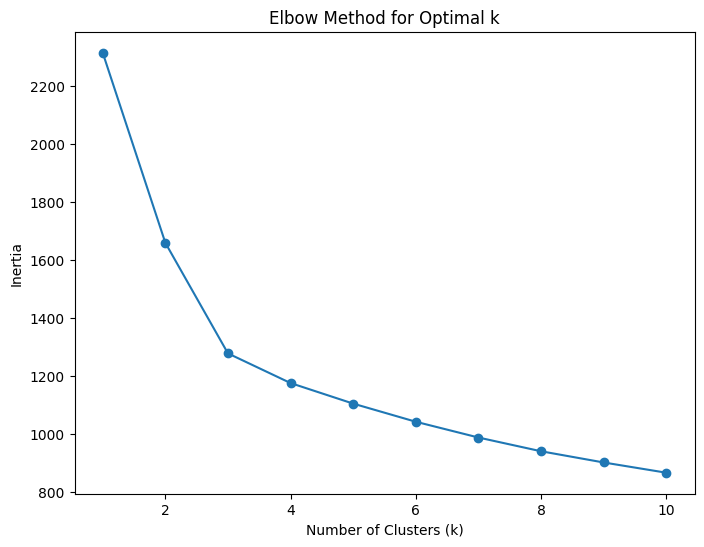

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Mengambil subset dari dataframe df berdasarkan kolom yang disebutkan
selected_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids',
                     'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
subset_df = df[selected_columns]

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

# Menyimpan inersia (within-cluster sum of squares) untuk setiap jumlah cluster k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


prompt : dengan dataframe bernama df, beri kode untuk membuat model k means clustering yang berisi atribut 'Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','	Flavanoids',	'Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline' jumlah cluster=5 dan beri kolom baru bernama label dan visualisasikan berdasarkan label. berikan juga penjelasan perbaris kode.

Penjelasan perbaris kode :
1. Mengimpor perpustakaan yang diperlukan, termasuk Pandas untuk manipulasi dataframe, Matplotlib untuk visualisasi, KMeans dari scikit-learn untuk k-means clustering, dan StandardScaler untuk standarisasi data.
2. Memilih subset dari dataframe df berdasarkan kolom yang disebutkan.
3. Melakukan standarisasi data untuk memastikan bahwa semua variabel memiliki skala yang serupa.
4. Membuat model k-means dengan jumlah cluster (n_clusters) sebanyak 5.
5. Menambahkan kolom baru 'label' ke dataframe yang berisi label cluster untuk setiap data.
6. Melakukan loop untuk setiap label dan visualisasi scatter plot untuk setiap cluster.
7. Menambahkan scatter plot untuk pusat cluster (centroids) yang ditandai dengan warna merah dan simbol 'X'.
8. Menampilkan judul dan label sumbu untuk plot.
9. Menampilkan legenda untuk membedakan cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


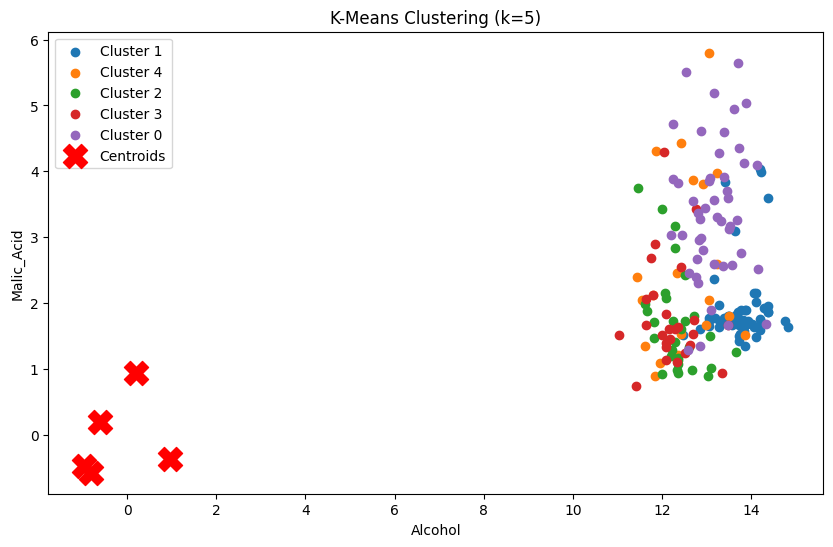

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Mengambil subset dari dataframe df berdasarkan kolom yang disebutkan
selected_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids',
                     'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
subset_df = df[selected_columns]

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

# Membuat model KMeans dengan jumlah cluster=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['label'] = kmeans.fit_predict(scaled_data)

# Visualisasi berdasarkan label
plt.figure(figsize=(10, 6))

# Loop untuk setiap label dan visualisasikan scatter plot
for label in df['label'].unique():
    cluster = df[df['label'] == label]
    plt.scatter(cluster['Alcohol'], cluster['Malic_Acid'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (k=5)')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.legend()
plt.show()


prompt : beri kode untuk menghitung nilai sillhouette score untuk k=2 hingga k=10. berikan penjelasan perbaris kode.

Penjelasan perbaris kode :
1. Mengimpor perpustakaan yang diperlukan, termasuk Pandas untuk manipulasi dataframe, KMeans dan silhouette_score dari scikit-learn untuk k-means clustering dan pengukuran Silhouette Score, serta StandardScaler untuk standarisasi data.
2. Memilih subset dari dataframe df berdasarkan kolom yang disebutkan.
3. Melakukan standarisasi data untuk memastikan bahwa semua variabel memiliki skala yang serupa.
4. Melakukan loop untuk setiap nilai k dari 2 hingga 10.
5. Membuat model K-Means dengan jumlah cluster k.
6. Menghitung label cluster untuk setiap data.
Menghitung nilai Silhouette Score dan mencetaknya. Nilai Silhouette Score berkisar antara -1 dan 1, dengan nilai lebih tinggi menunjukkan cluster yang lebih baik terdefinisi.

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Mengambil subset dari dataframe df berdasarkan kolom yang disebutkan
selected_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids',
                     'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
subset_df = df[selected_columns]

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

# Menghitung Silhouette Score untuk k=2 hingga k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, labels)
    print(f"For k={k}, the silhouette score is {silhouette_avg:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the silhouette score is 0.2683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the silhouette score is 0.2849


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the silhouette score is 0.2517
For k=5, the silhouette score is 0.2272


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=6, the silhouette score is 0.1958
For k=7, the silhouette score is 0.2091


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=8, the silhouette score is 0.1358


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=9, the silhouette score is 0.1458


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the silhouette score is 0.1339


prompt : beri kode untuk menghitung nilai Davies Bouldin Index score untuk k=2 hingga k=10. berikan penjelasan perbaris kode.

Penjelasan perbaris kode :
1. Mengimpor perpustakaan yang diperlukan, termasuk KMeans untuk k-means clustering, davies_bouldin_score untuk menghitung Davies-Bouldin Index, dan StandardScaler untuk standarisasi data.
2. Memilih subset dari dataframe df berdasarkan kolom yang disebutkan.
3. Melakukan standarisasi data untuk memastikan bahwa semua variabel memiliki skala yang serupa.
4. Loop untuk setiap nilai k dari 2 hingga 10.
5. Membuat model k-means untuk setiap nilai k, mendapatkan label cluster, dan menghitung Davies-Bouldin Index.
6. Menyimpan nilai DBI dalam list dbi_scores.
7. Menampilkan hasil Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10. Semakin rendah nilai DBI, semakin baik partisi clusteringnya.

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Mengambil subset dari dataframe df berdasarkan kolom yang disebutkan
selected_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids',
                     'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
subset_df = df[selected_columns]

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

# Inisialisasi list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Loop untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    # Membuat model KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Mendapatkan label cluster untuk setiap data
    labels = kmeans.fit_predict(scaled_data)

    # Menghitung Davies-Bouldin Index dan menyimpannya
    dbi = davies_bouldin_score(scaled_data, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil
for k, dbi in zip(range(2, 11), dbi_scores):
    print(f'Clusters: {k}, Davies-Bouldin Index: {dbi}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Clusters: 2, Davies-Bouldin Index: 1.4482356342193663
Clusters: 3, Davies-Bouldin Index: 1.3891879777181648
Clusters: 4, Davies-Bouldin Index: 1.8172221736430871
Clusters: 5, Davies-Bouldin Index: 1.691307828823519
Clusters: 6, Davies-Bouldin Index: 1.8331229633562307
Clusters: 7, Davies-Bouldin Index: 1.5976184554552624
Clusters: 8, Davies-Bouldin Index: 1.8331341512591757
Clusters: 9, Davies-Bouldin Index: 1.7470045075967962
Clusters: 10, Davies-Bouldin Index: 1.7486279882426885


prompt : beri kode untuk menghitung nilai Calinski-Harabasz Index score untuk k=2 hingga k=10. berikan penjelasan perbaris kode.

Penjelasan perbaris kode :
1. Mengimpor perpustakaan yang diperlukan, termasuk KMeans dari scikit-learn untuk k-means clustering, calinski_harabasz_score untuk menghitung Calinski-Harabasz Index, dan StandardScaler untuk standarisasi data.
2. Memilih subset dari dataframe df berdasarkan kolom yang disebutkan.
3. Melakukan standarisasi data untuk memastikan bahwa semua variabel memiliki skala yang serupa.
4. Melakukan loop untuk setiap nilai k dari 2 hingga 10.
5. Membuat model k-means untuk setiap nilai k dan mendapatkan label cluster.
6. Menghitung Calinski-Harabasz Index score menggunakan fungsi calinski_harabasz_score.
7. Mencetak nilai Calinski-Harabasz Index untuk setiap nilai k. Semakin tinggi nilainya, semakin baik partisi clusteringnya.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Mengambil subset dari dataframe df berdasarkan kolom yang disebutkan
selected_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids',
                     'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
subset_df = df[selected_columns]

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

# Mencetak nilai Calinski-Harabasz Index score untuk k=2 hingga k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = calinski_harabasz_score(scaled_data, labels)
    print(f'Calinski-Harabasz Index for k={k}: {score}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calinski-Harabasz Index for k=2: 69.48646422404195


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calinski-Harabasz Index for k=3: 70.94000800315118
Calinski-Harabasz Index for k=4: 56.15446731005523
Calinski-Harabasz Index for k=5: 47.331926636342615
Calinski-Harabasz Index for k=6: 41.96471333831672
Calinski-Harabasz Index for k=7: 38.24639729443255


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=8: 35.45347470260183
Calinski-Harabasz Index for k=9: 33.06458540120726
Calinski-Harabasz Index for k=10: 31.165714611025724


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
